In [20]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 8.2 MB/s            


In [1]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sweetviz as sv

In [2]:
#import train dataset
df= pd.read_csv('train.csv')
df.sample(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
200770,200771,Male,42,1,28.0,0,1-2 Year,Yes,32353.0,124.0,211,0
274468,274469,Male,59,1,1.0,0,1-2 Year,No,2630.0,122.0,168,0
5743,5744,Male,55,1,5.0,1,1-2 Year,No,27557.0,124.0,37,0


# EDA

In [6]:
#checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


## Dataset classification

<img src="classificacao_dados.png">

## Dataset statistics

In [8]:
#checking NaN values
#we don't have NaN values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
#checking stats
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
df.describe(include="O")

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


Primeiro Quartil:  25.0
Segundo Quartil:  36.0
Terceiro Quartil:  49.0
IQR:  24.0


<AxesSubplot:xlabel='Age'>

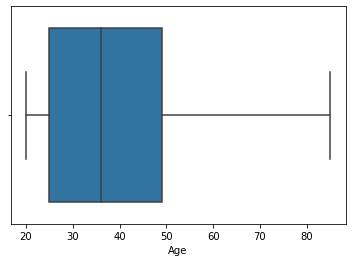

In [14]:
#Age
Q1a = df['Age'].quantile(0.25)
Q2a = df['Age'].quantile(0.5)
Q3a = df['Age'].quantile(0.75)


#intervalo Interquartil(IQR)
#quando os dados contêm muitos outliers por ser menos sensível às variações nos extremos do conjunto.
IQRa = Q3a - Q1a

print(f'Primeiro Quartil: ', Q1a)
print(f'Segundo Quartil: ', Q2a)
print(f'Terceiro Quartil: ', Q3a)
print(f'IQR: ', IQRa)

sns.boxplot(x=df['Age'])

Primeiro Quartil:  24405.0
Segundo Quartil:  31669.0
Terceiro Quartil:  39400.0
IQR:  14995.0


<AxesSubplot:xlabel='Annual_Premium'>

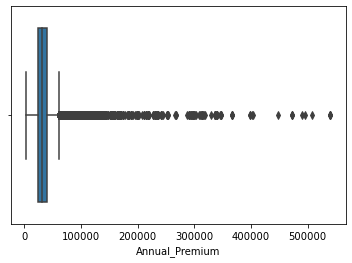

In [15]:
#Annual_Premium
Q1ap = df['Annual_Premium'].quantile(0.25)
Q2ap = df['Annual_Premium'].quantile(0.5)
Q3ap = df['Annual_Premium'].quantile(0.75)

#intervalo Interquartil(IQR)
#quando os dados contêm muitos outliers por ser menos sensível às variações nos extremos do conjunto.
IQRap = Q3ap - Q1ap

print(f'Primeiro Quartil: ', Q1ap)
print(f'Segundo Quartil: ', Q2ap)
print(f'Terceiro Quartil: ', Q3ap)
print(f'IQR: ', IQRap)

sns.boxplot(x=df['Annual_Premium'])
#Preciaremos investigar sobre os outliers neste atributo. Ver correlação com idade, sexo, previo sinistro, etc.

Primeiro Quartil:  82.0
Segundo Quartil:  154.0
Terceiro Quartil:  227.0
IQR:  145.0


<AxesSubplot:xlabel='Vintage'>

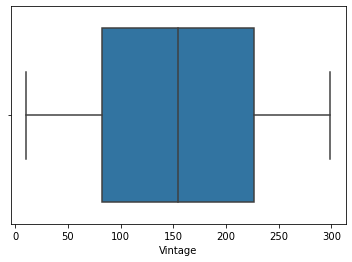

In [16]:
#Vintage
Q1v = df['Vintage'].quantile(0.25)
Q2v = df['Vintage'].quantile(0.5)
Q3v = df['Vintage'].quantile(0.75)

#intervalo Interquartil(IQR)
#quando os dados contêm muitos outliers por ser menos sensível às variações nos extremos do conjunto.
IQRv = Q3v - Q1v

print(f'Primeiro Quartil: ', Q1v)
print(f'Segundo Quartil: ', Q2v)
print(f'Terceiro Quartil: ', Q3v)
print(f'IQR: ', IQRv)

sns.boxplot(x=df['Vintage'])

In [17]:
#Verificando a assimetria dos dados (distribuição dos dados em torno da média). 
assimetria= df.skew()
assimetria


id                      9.443274e-16
Age                     6.725390e-01
Driving_License        -2.159518e+01
Region_Code            -1.152664e-01
Previously_Insured      1.677471e-01
Annual_Premium          1.766087e+00
Policy_Sales_Channel   -9.000081e-01
Vintage                 3.029517e-03
Response                2.301906e+00
dtype: float64

In [18]:
# A curtose nos ajuda a dar forma à distribuição dos dados
curtose= df.kurtosis()
curtose

id                       -1.200000
Age                      -0.565655
Driving_License         464.354302
Region_Code              -0.867857
Previously_Insured       -1.971871
Annual_Premium           34.004569
Policy_Sales_Channel     -0.970810
Vintage                  -1.200688
Response                  3.298788
dtype: float64

In [19]:
#Verificando os valores da classe.
df.Response.value_counts()
#Precisaremos trabalhar com o balanceamento das classes do dataset

0    334399
1     46710
Name: Response, dtype: int64

## Utilizando o sweetviz

In [22]:
#importando o arquvio de teste
df_test = pd.read_csv("test.csv")
df_test.sample(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
43140,424250,Male,48,1,48.0,0,1-2 Year,Yes,2630.0,26.0,103
89055,470165,Female,20,1,17.0,0,< 1 Year,Yes,26944.0,160.0,63
66316,447426,Male,41,1,2.0,0,1-2 Year,Yes,29995.0,26.0,106


In [23]:
#Comparando os datasets de acordo com o guidebook do sweetviz
comparison_report = sv.compare([df,'Treino'], [df_test,'Teste'], target_feat='Response')

                                             |          | [  0%]   00:00 -> (? left)


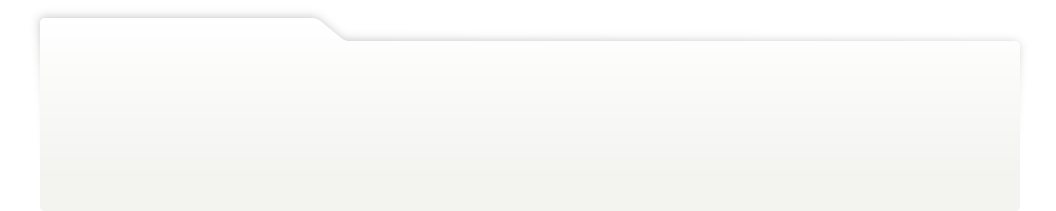
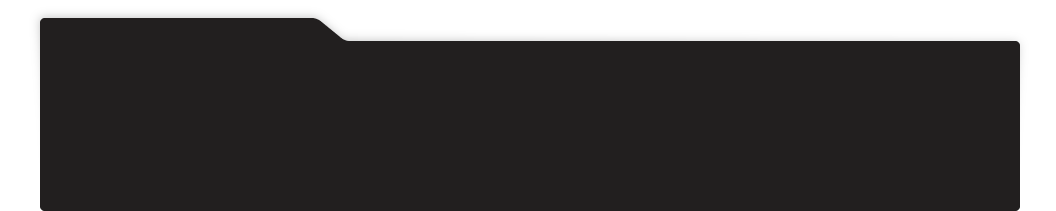
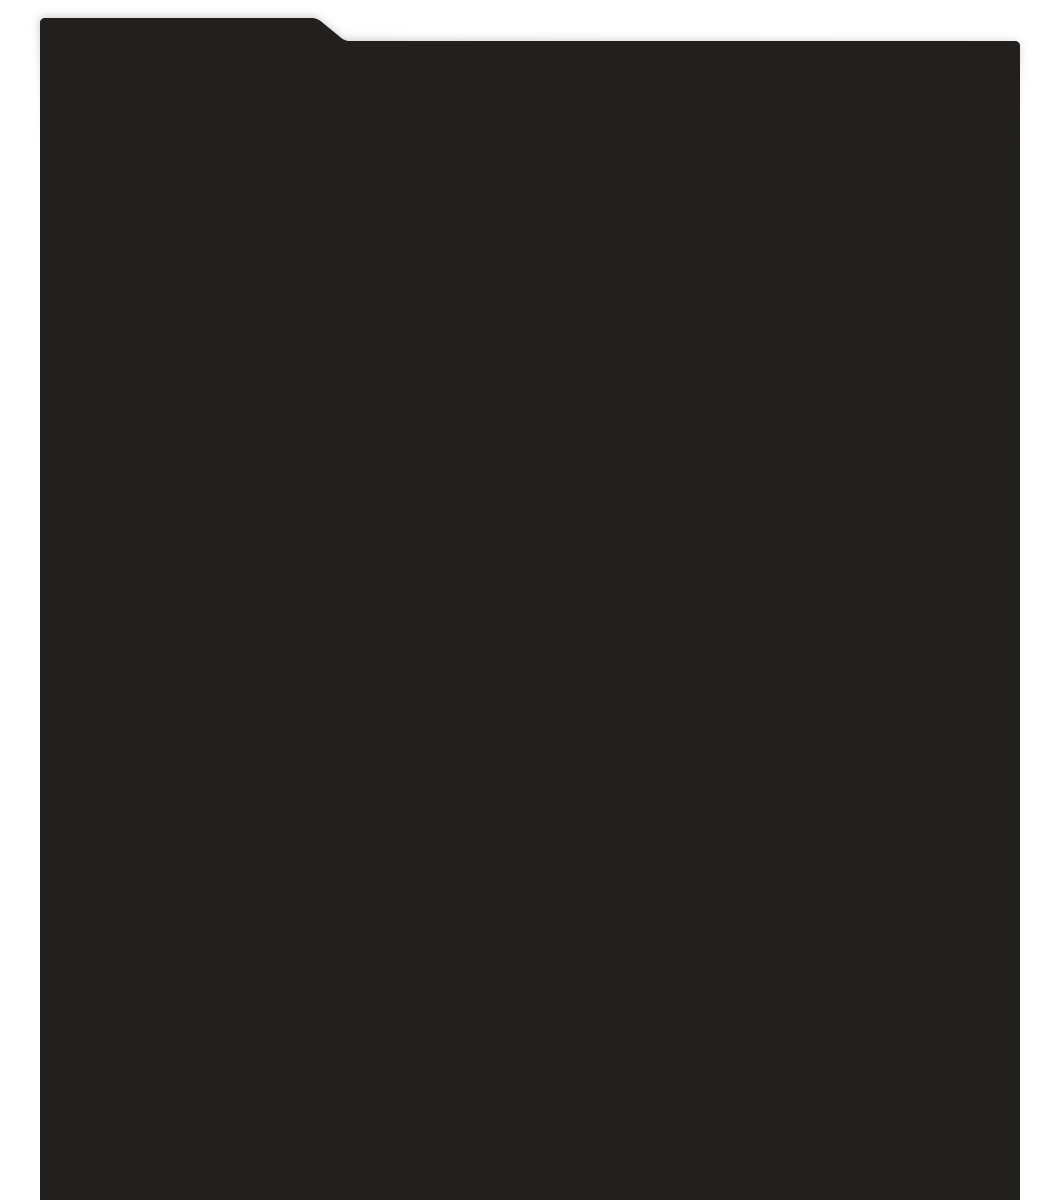
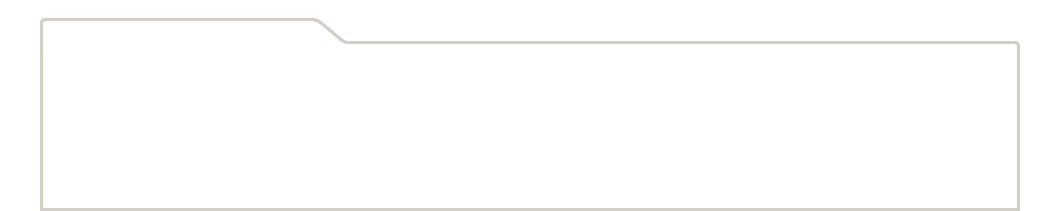
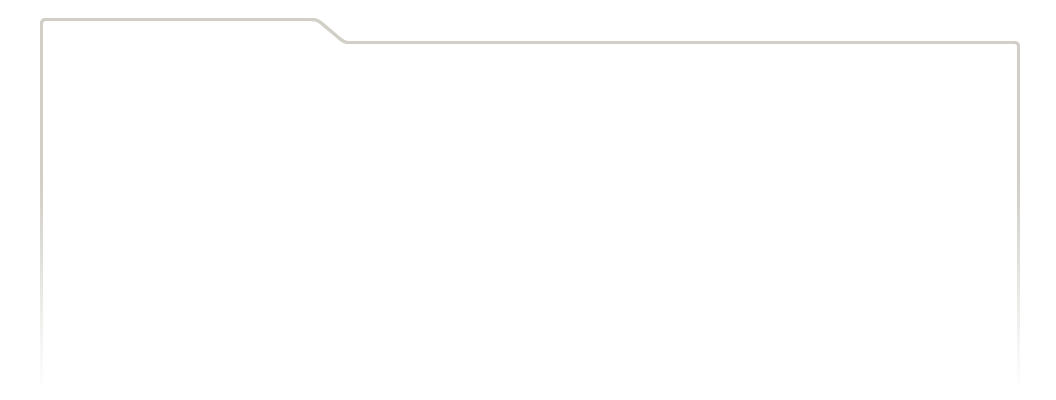
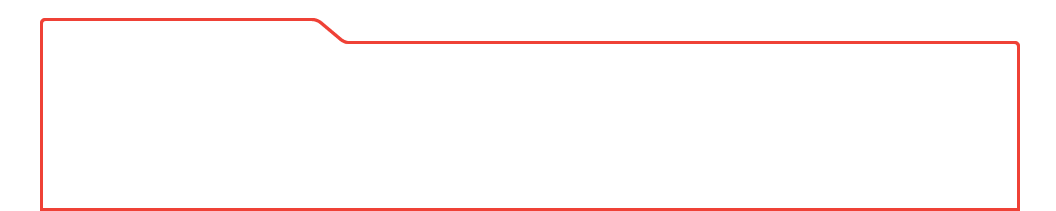
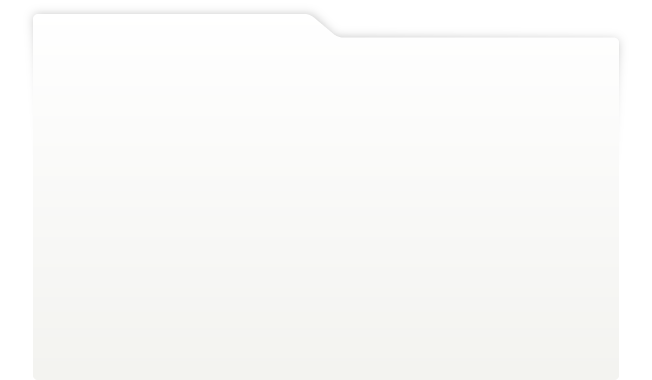
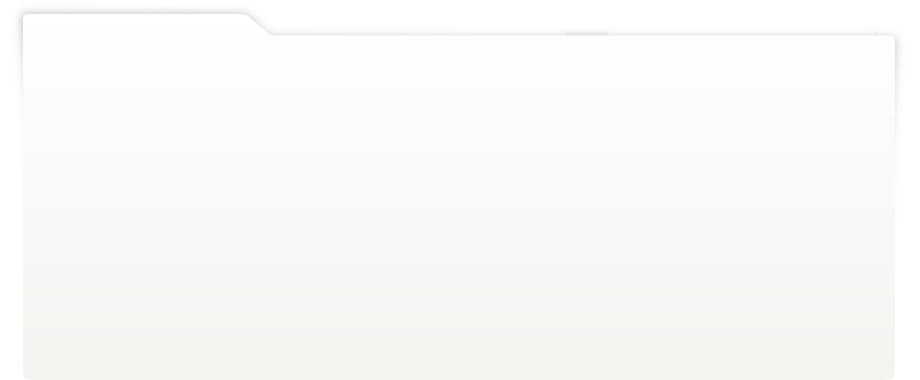
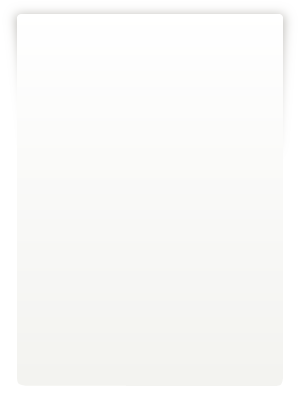
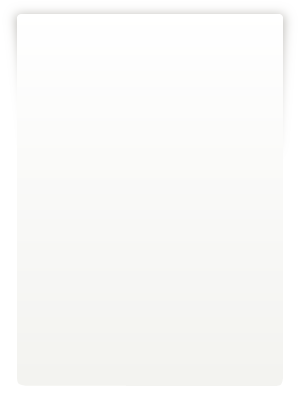
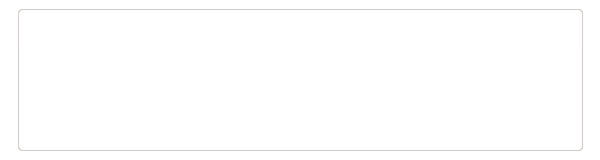
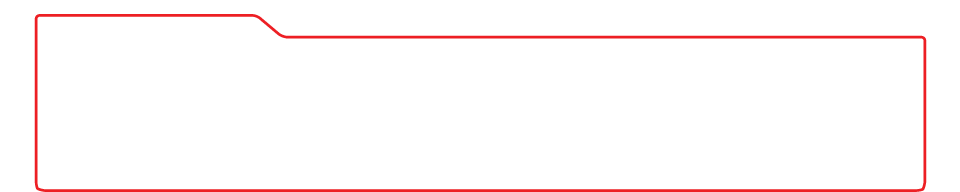
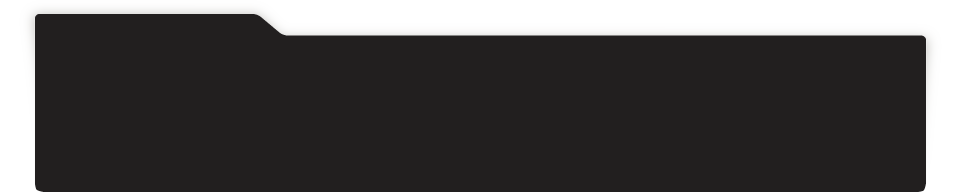
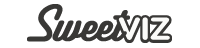
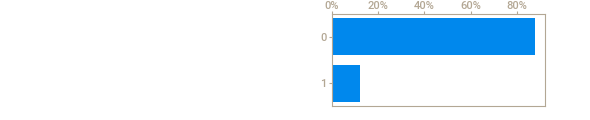
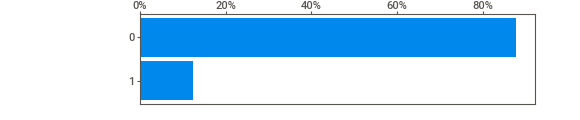
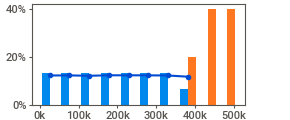
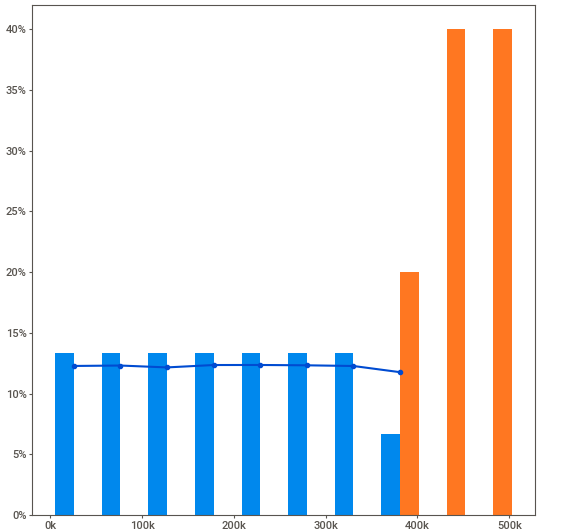
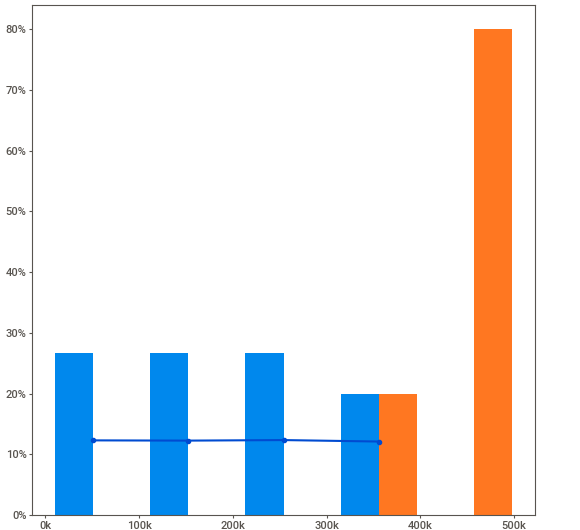
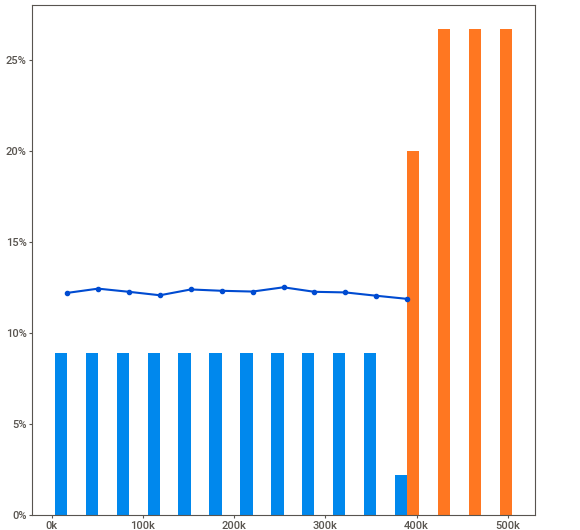
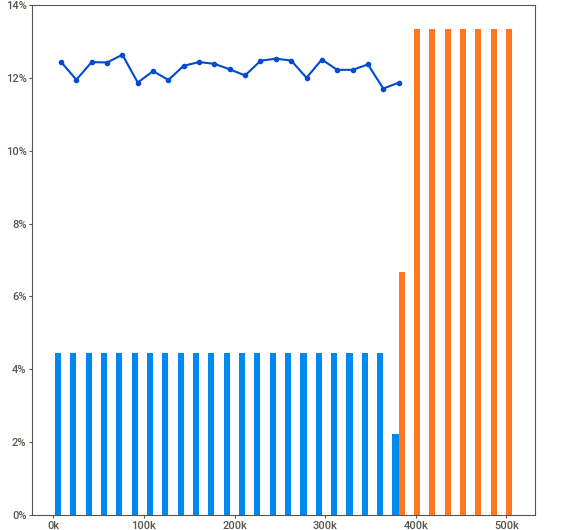
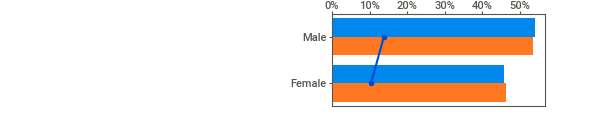
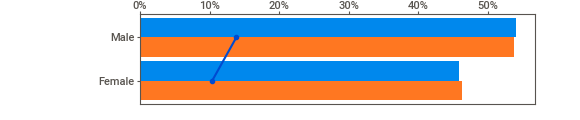
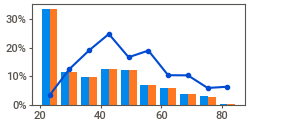
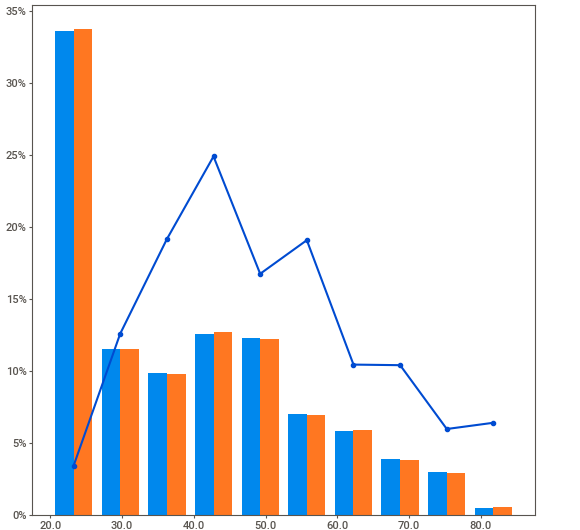
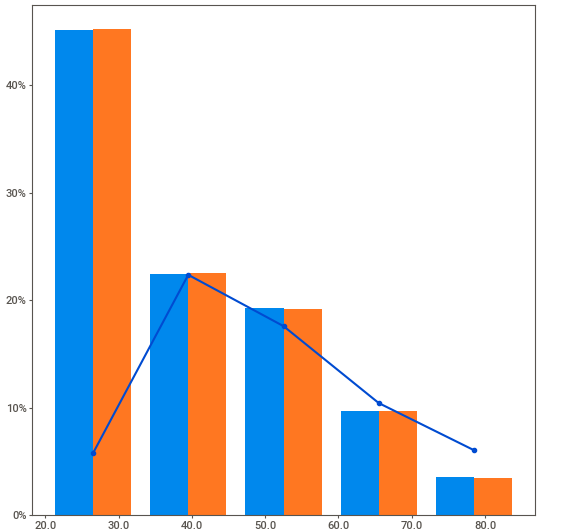
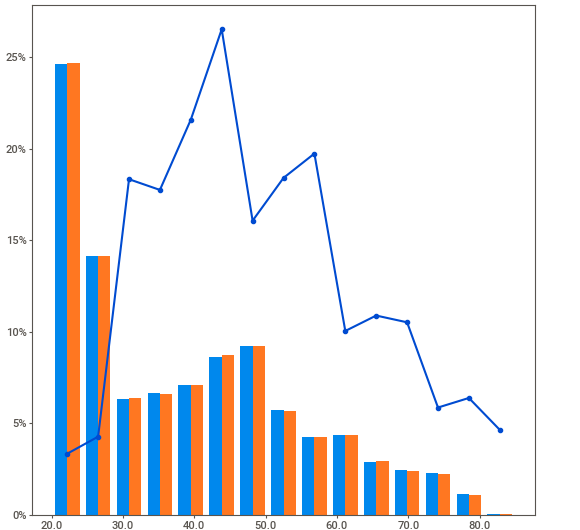
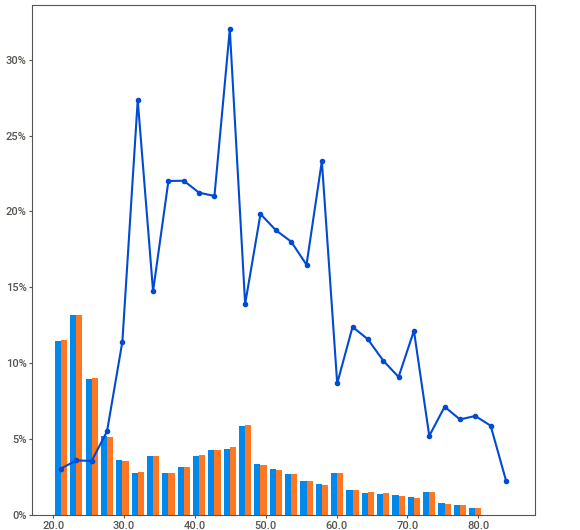
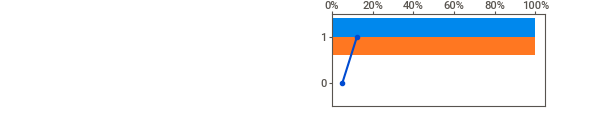
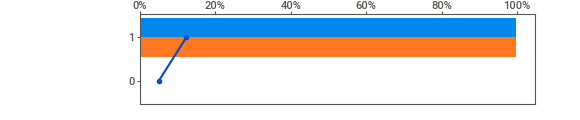
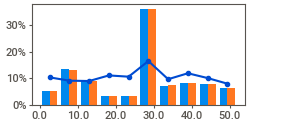
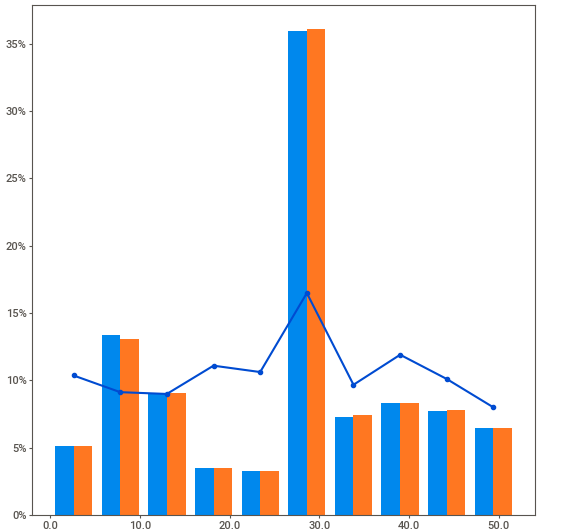
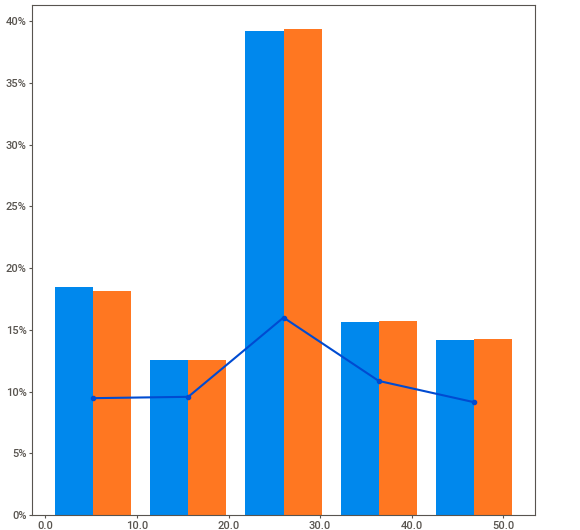
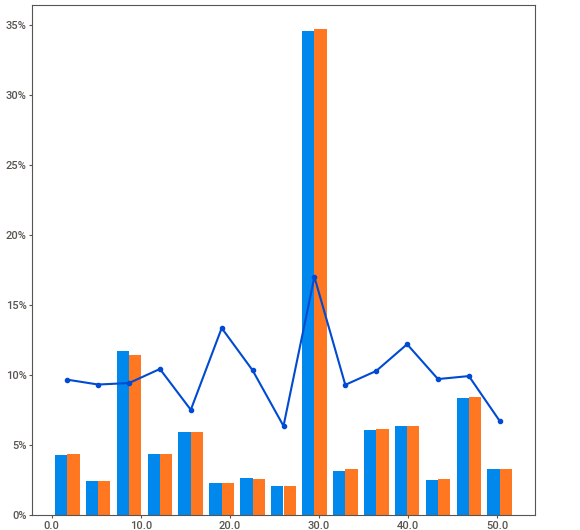
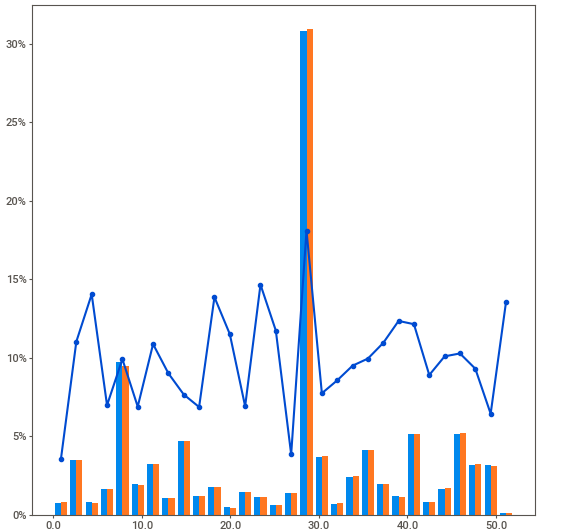
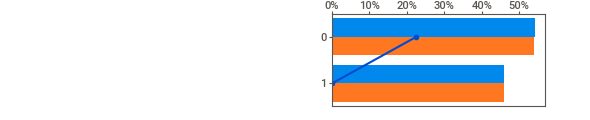
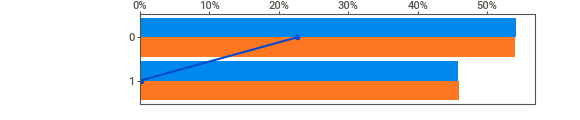
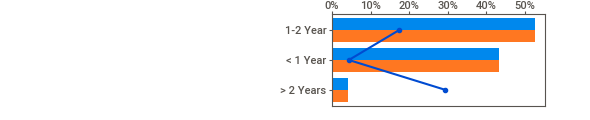
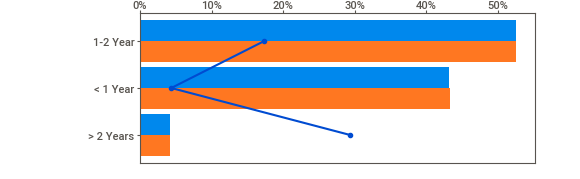
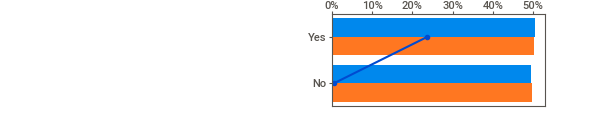
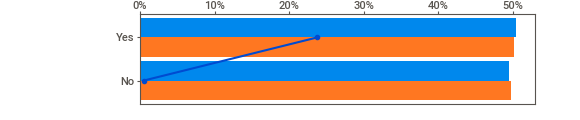
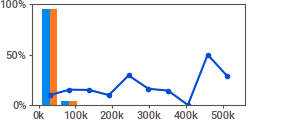
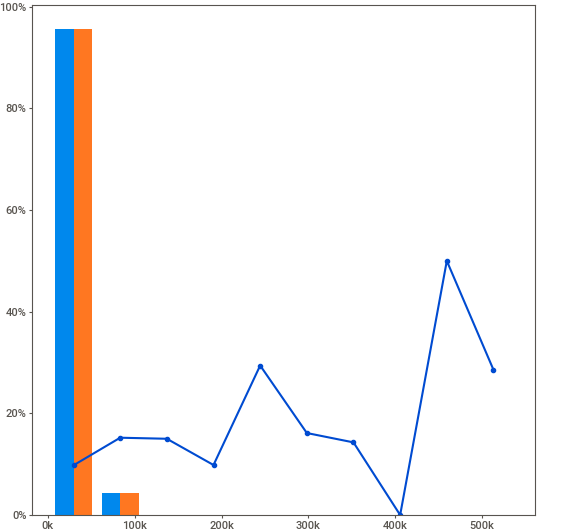
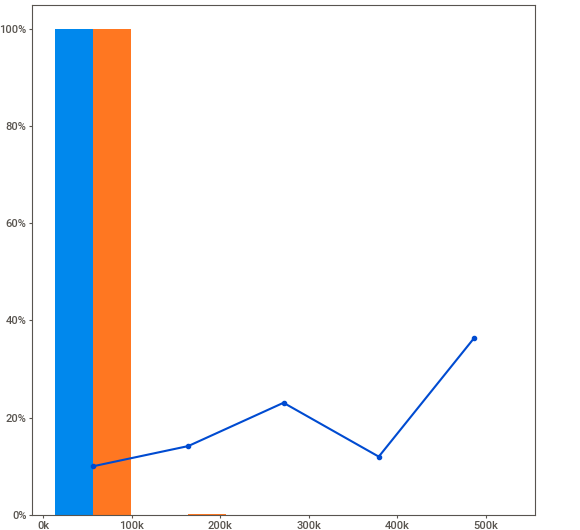
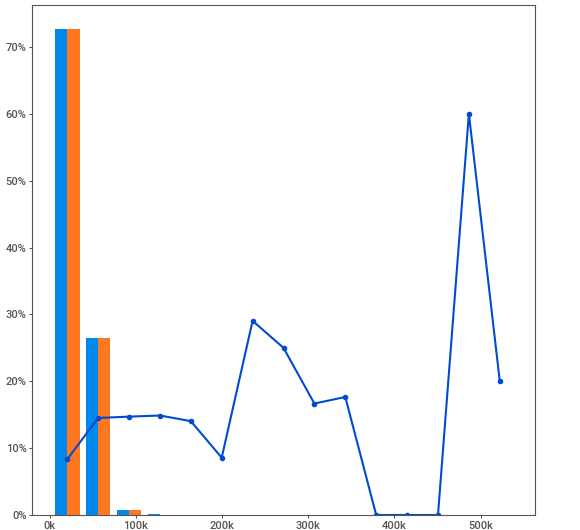
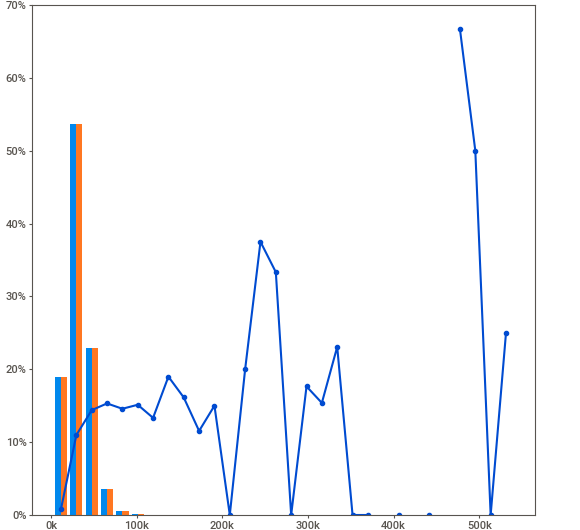
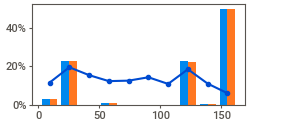
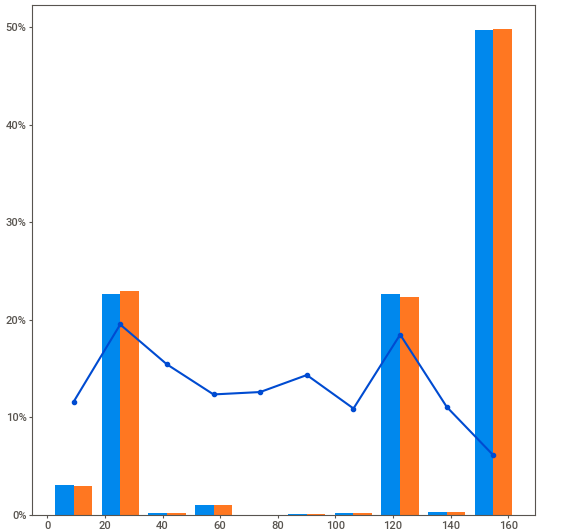
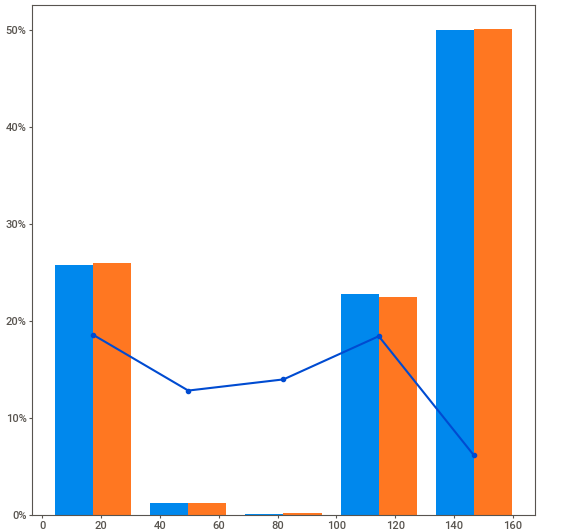
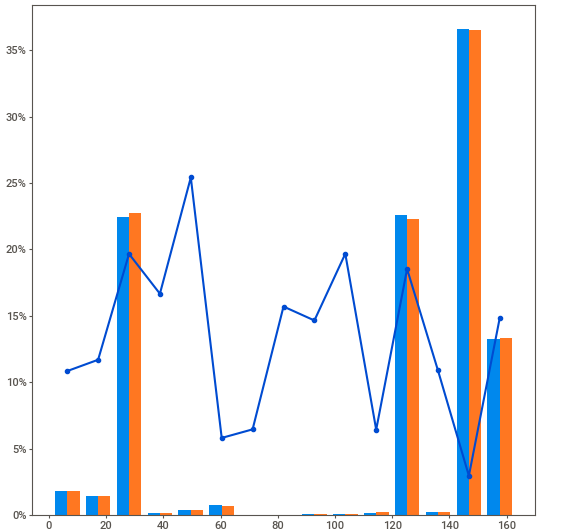
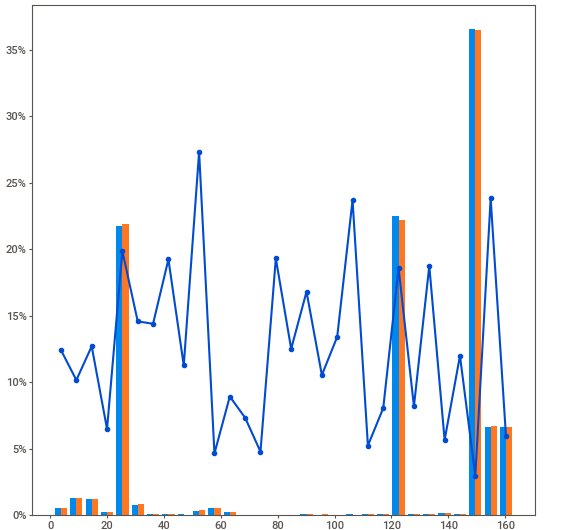
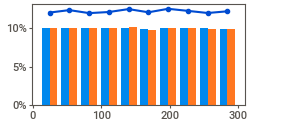
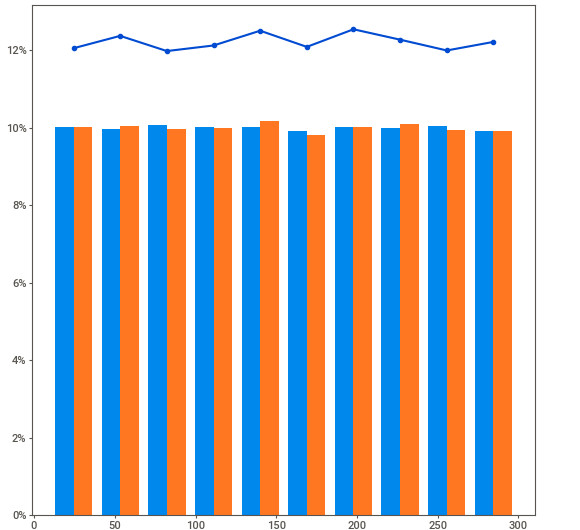
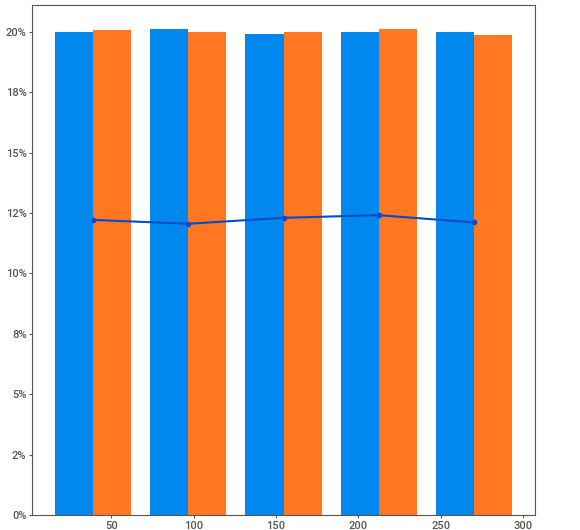
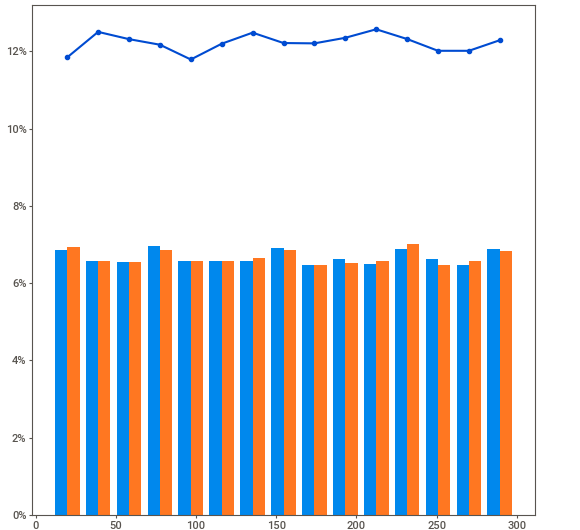
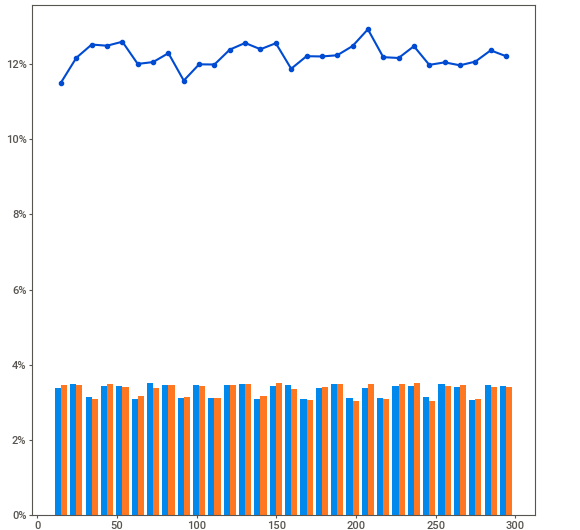
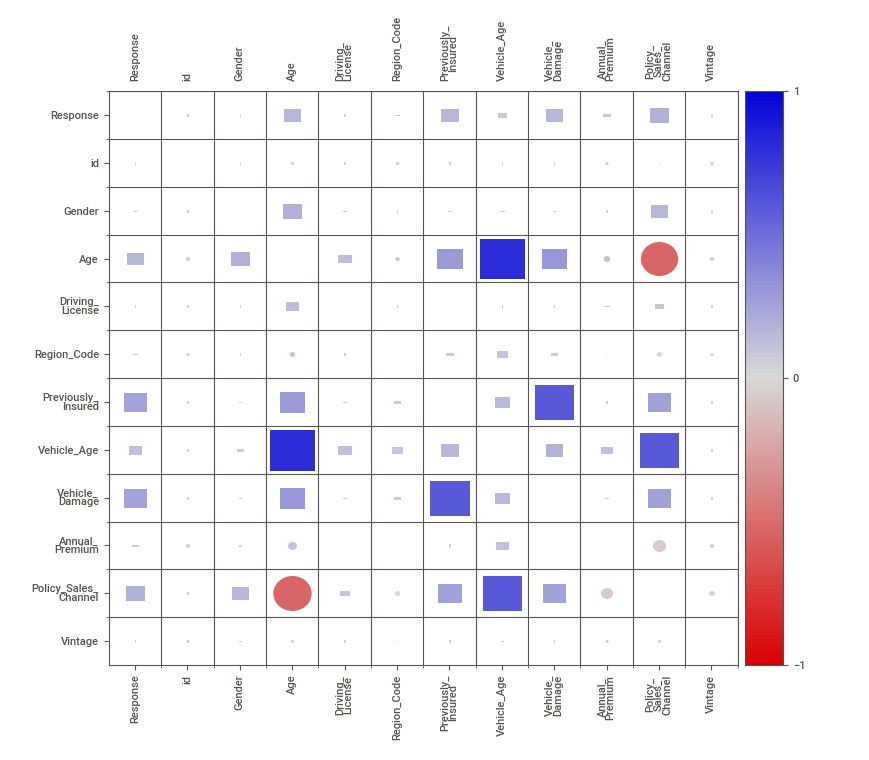
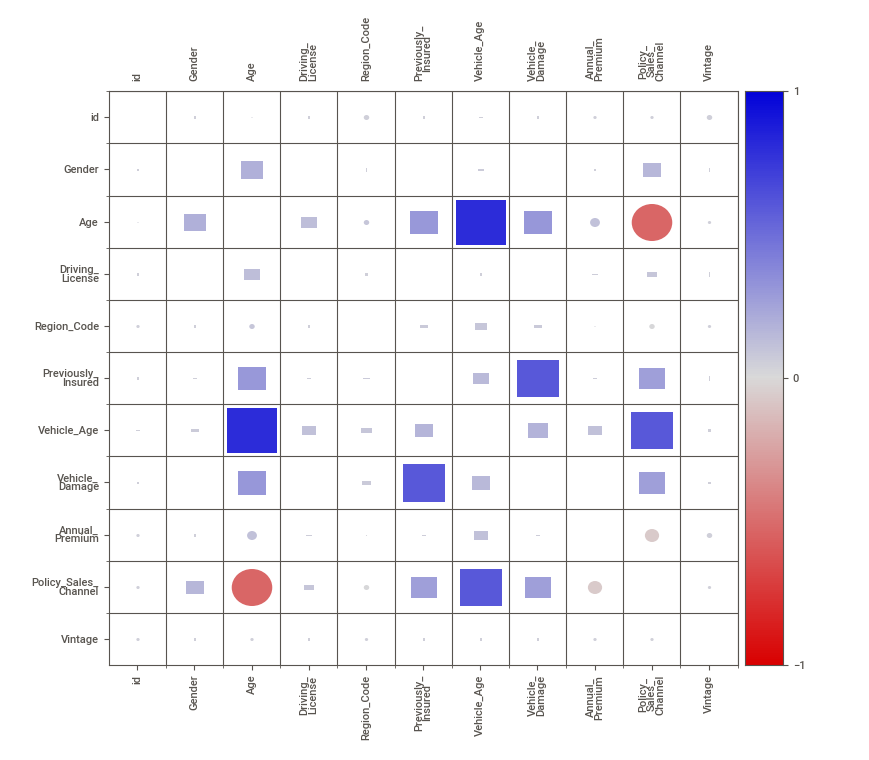

In [24]:
comparison_report.show_notebook()

## Primeiros insights dos dados

# Respondendo as perguntas de negócio

In [62]:
#Criando uma cópia do dataset
df_ = df.copy()

#Tratando os dados
"""
Gender: 0: Male, 1: Female
Vehicle_Age: 0: <1year, 1: 1-2years, 2: >2 anos
Vehicle_Damage: 0:No, 1:Yes
id: drop
"""


df_['Gender'] = df_['Gender'].replace({'Male': 0, 'Female': 1})
df_['Vehicle_Age'] = df_['Vehicle_Age'].replace({'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0})
df_['Vehicle_Damage'] = df_['Vehicle_Damage'].replace({'Yes': 1, 'No': 0})
df_.drop(["id"], axis=1, inplace=True)
df_

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,0,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,0,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,0,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,1,68,1,14.0,0,2,1,44617.0,124.0,74,0


### Quem é o nosso cliente?

In [ ]:
É uma empresa de seguro saúde que quer fazer venda casada com seguro veicular.

### Quem é o cliente do nosso cliente?


### Como poderíamos oferecer uma melhor experiencia ao público que não tiveram seguro veicular antes?

###  1. Qual o perfil dos clientes interessados no seguro de veículo

"""
1. Isolando as pessoas que tem interesse na variável "df_interested"
2. O total de interessados é de 46.710, com idade média de 43 anos. As mulheres representam 38.93% dos interessados.
3. Há um baixo interesse nos públicos entre 30 e 40 anos, e a partir dos 55 anos. O pico é entre os mais jovens de 20 a 30 anos.
4. a grande massa possui veiculo de 1 a 2 anos de idade.
5. Não fecham o ano fiscal de contrato

"""

In [40]:
# Isolando os valores do atributo Response = 1

df_interested = df_[df_['Response']==1]
df_interested

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
7,1,56,1,28.0,0,1,1,32031.0,26.0,72,1
10,1,47,1,35.0,0,1,1,47576.0,124.0,46,1
15,0,37,1,6.0,0,1,1,2630.0,156.0,147,1
...,...,...,...,...,...,...,...,...,...,...,...
381057,0,40,1,46.0,0,1,1,27508.0,26.0,189,1
381061,1,41,1,28.0,0,1,1,37377.0,124.0,99,1
381073,1,46,1,28.0,0,1,1,34741.0,124.0,167,1
381075,1,61,1,28.0,0,1,1,43875.0,26.0,139,1


In [71]:
#Contagem de genero
gender_total = len(df_interested.Gender)
df_int_female= (df_interested['Gender'].loc[df_interested['Gender']==1].value_counts()/gender_total)*100
df_int_male= (df_interested['Gender'].loc[df_interested['Gender']==0].value_counts()/gender_total)*100

#idade média

df_int_age = df_interested.Age.mean()

#print("O total de interessados é de", gender_total, "que tem em média" ,df_int_age, "de idade. As mulheres representam" ,df_int_female, "e os homens,",df_int_male)
print(df_int_female)
print(df_int_male)


1    38.931706
Name: Gender, dtype: float64
0    61.068294
Name: Gender, dtype: float64


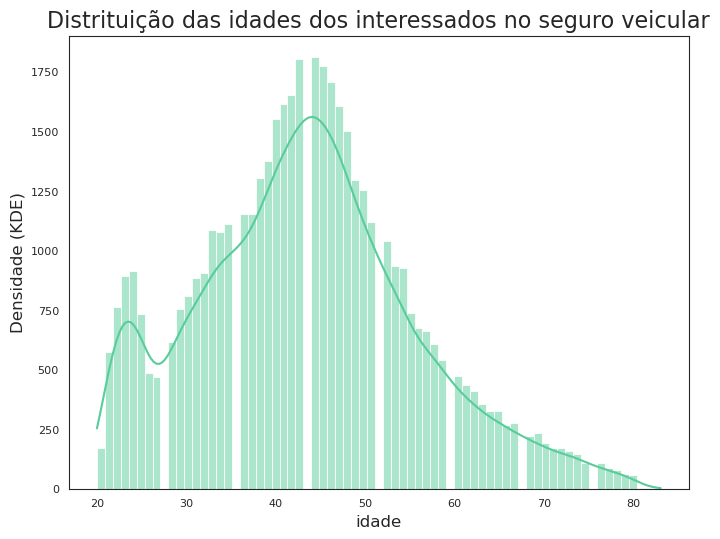

In [42]:
#Visualizando a distribuição das idades dos interessados
fig, ax = plt.subplots(figsize=(8,6))
sns.histplot(df_interested["Age"], color="#58CC99", kde=True, ax=ax)
ax.set_title("Distrituição das idades dos interessados no seguro veicular", fontsize= 16)
plt.xlabel("idade", fontsize=12)
plt.ylabel("Densidade (KDE)", fontsize=12)
plt.show()

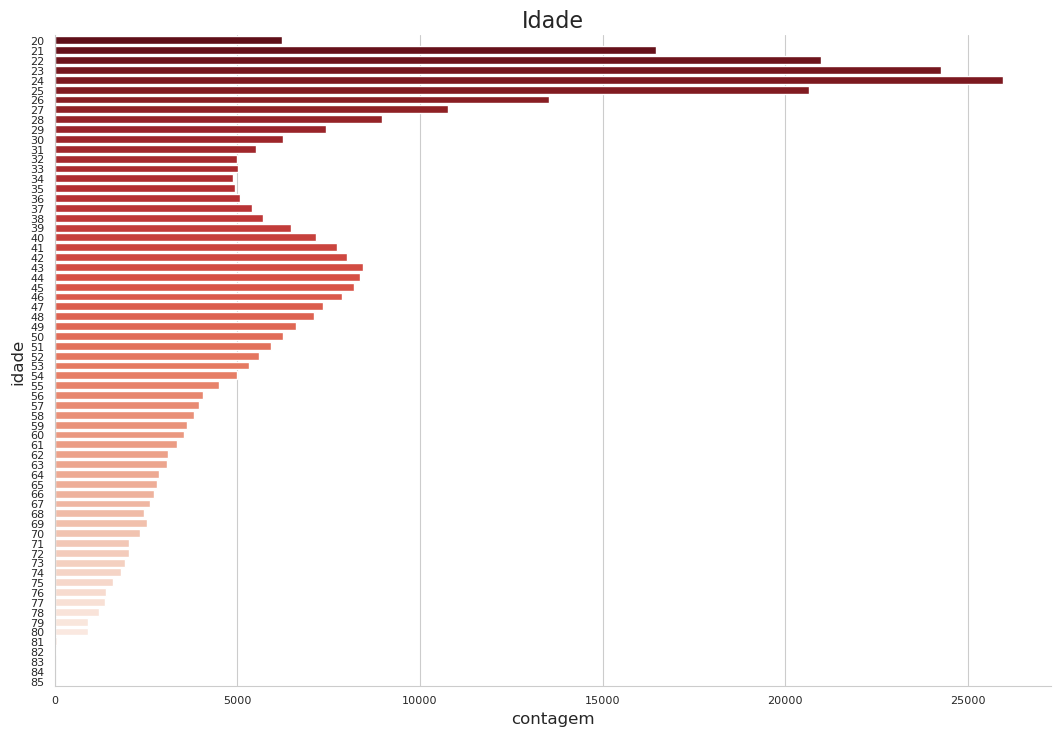

In [54]:
sns.set_style("whitegrid")
g = sns.catplot(y="Age", data=df_, kind="count", palette="Reds_r", height=7, aspect=1.5)
g.ax.set_title("Idade",fontdict={'size':16})
g.ax.xaxis.set_label_text("contagem",fontdict= {'size':12})
g.ax.yaxis.set_label_text("idade",fontdict= {'size':12})
plt.show()

array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Driving_License'}>],
       [<AxesSubplot:title={'center':'Region_Code'}>,
        <AxesSubplot:title={'center':'Previously_Insured'}>,
        <AxesSubplot:title={'center':'Vehicle_Age'}>],
       [<AxesSubplot:title={'center':'Vehicle_Damage'}>,
        <AxesSubplot:title={'center':'Annual_Premium'}>,
        <AxesSubplot:title={'center':'Policy_Sales_Channel'}>],
       [<AxesSubplot:title={'center':'Vintage'}>,
        <AxesSubplot:title={'center':'Response'}>, <AxesSubplot:>]],
      dtype=object)

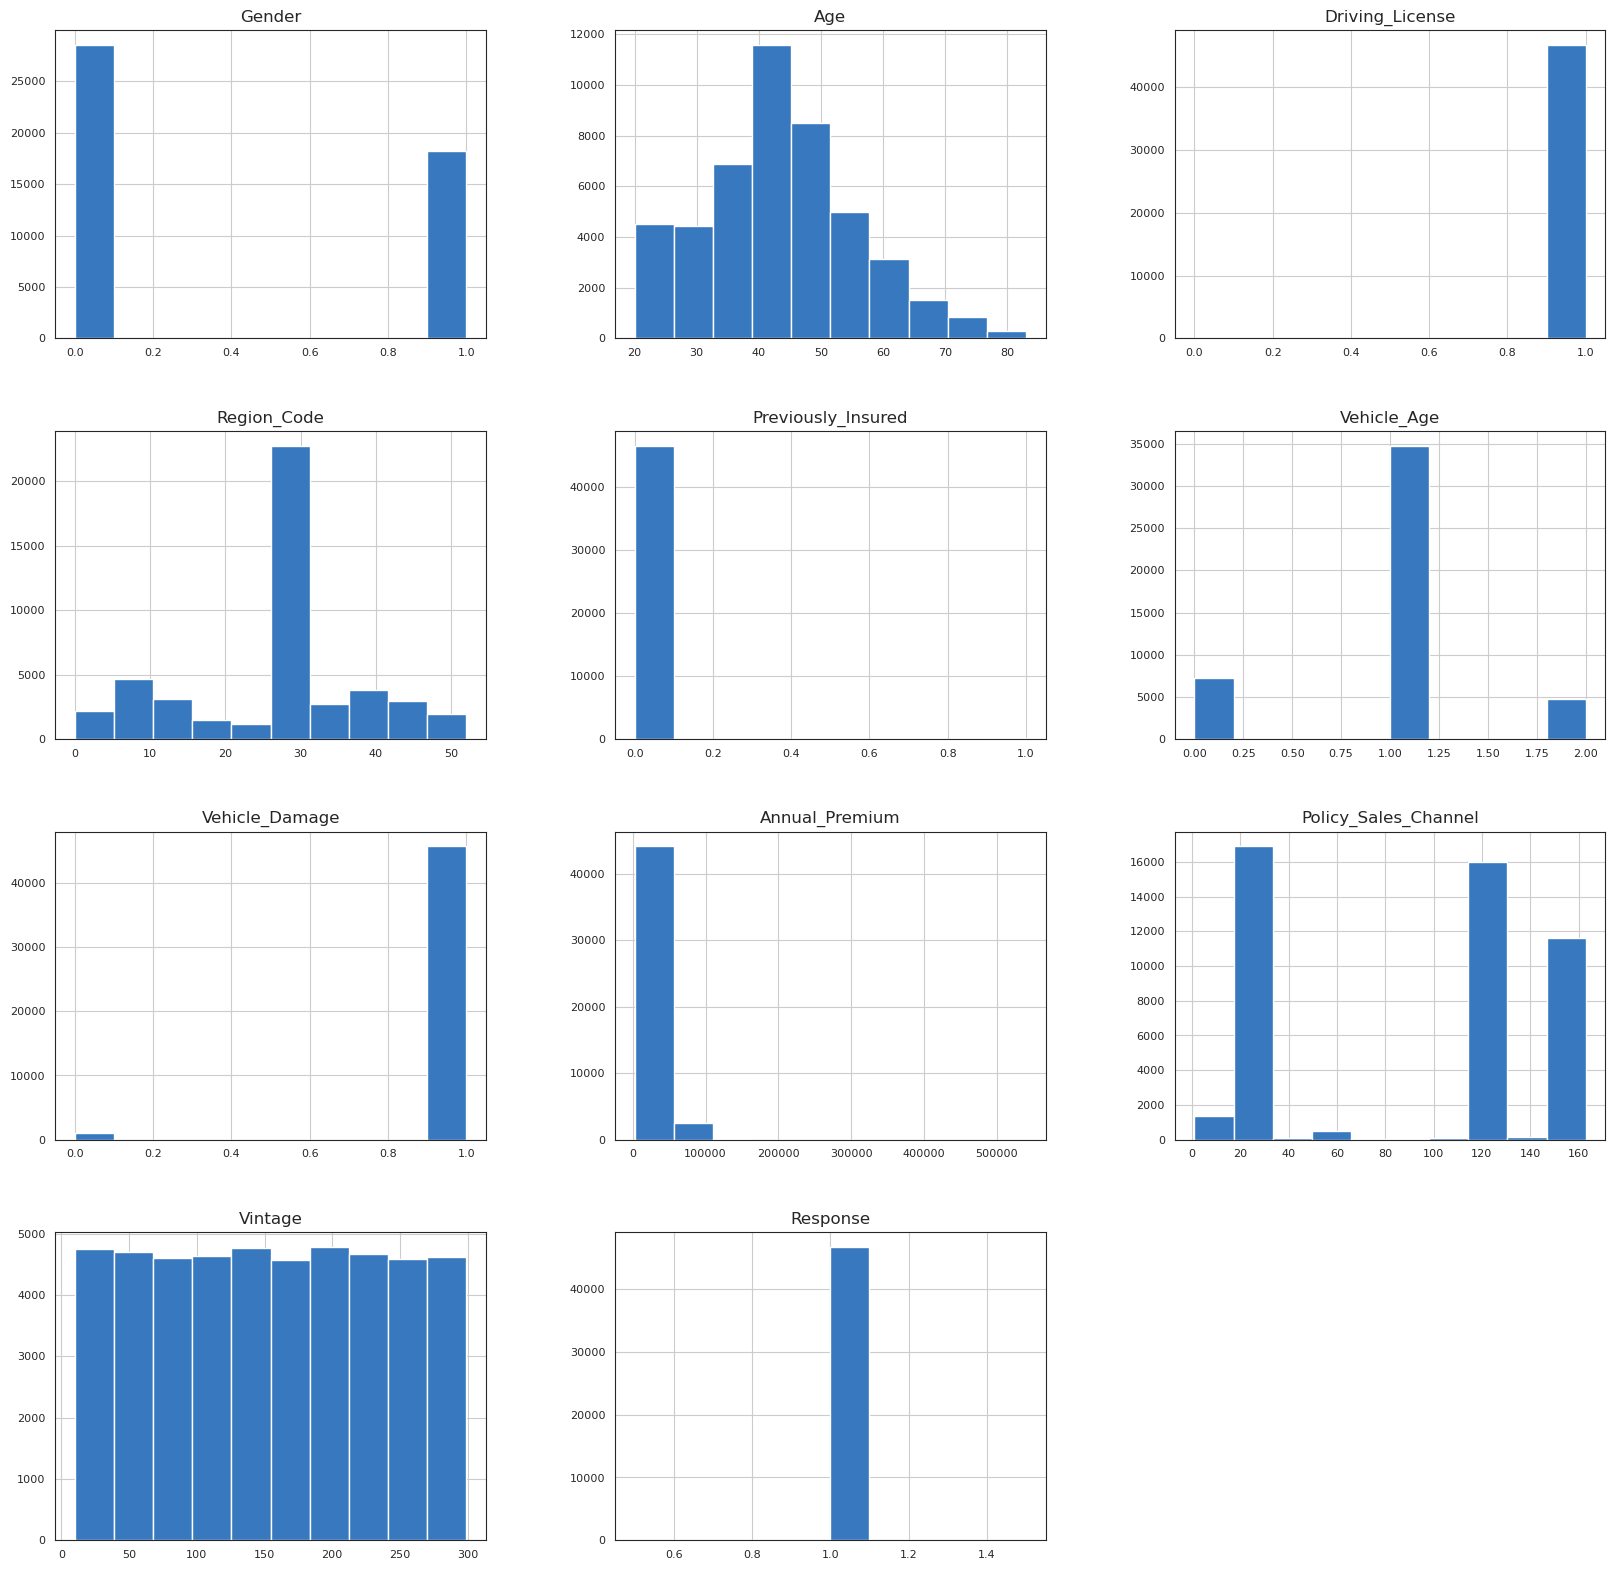

In [44]:
df_interested.hist(figsize=(20,20))

In [55]:
df_.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

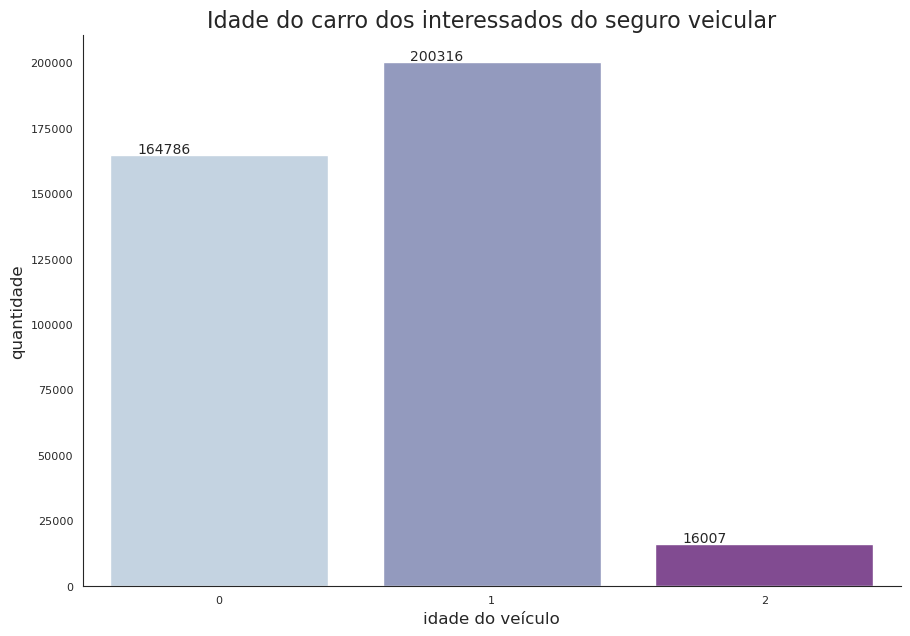

In [52]:
#Idade do carro dos interessados do seguro veicular
sns.set_style("white")
g = sns.catplot(x="Vehicle_Age", data=df_, kind="count", palette="BuPu", height=6, aspect=1.5)
g.ax.xaxis.set_label_text("idade do veículo",fontdict= {'size':12})
g.ax.yaxis.set_label_text("quantidade", fontdict= {'size':12})
g.ax.set_title("Idade do carro dos interessados do seguro veicular",fontdict= {'size':16})
# to get the counts on the top heads of the bar
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or 

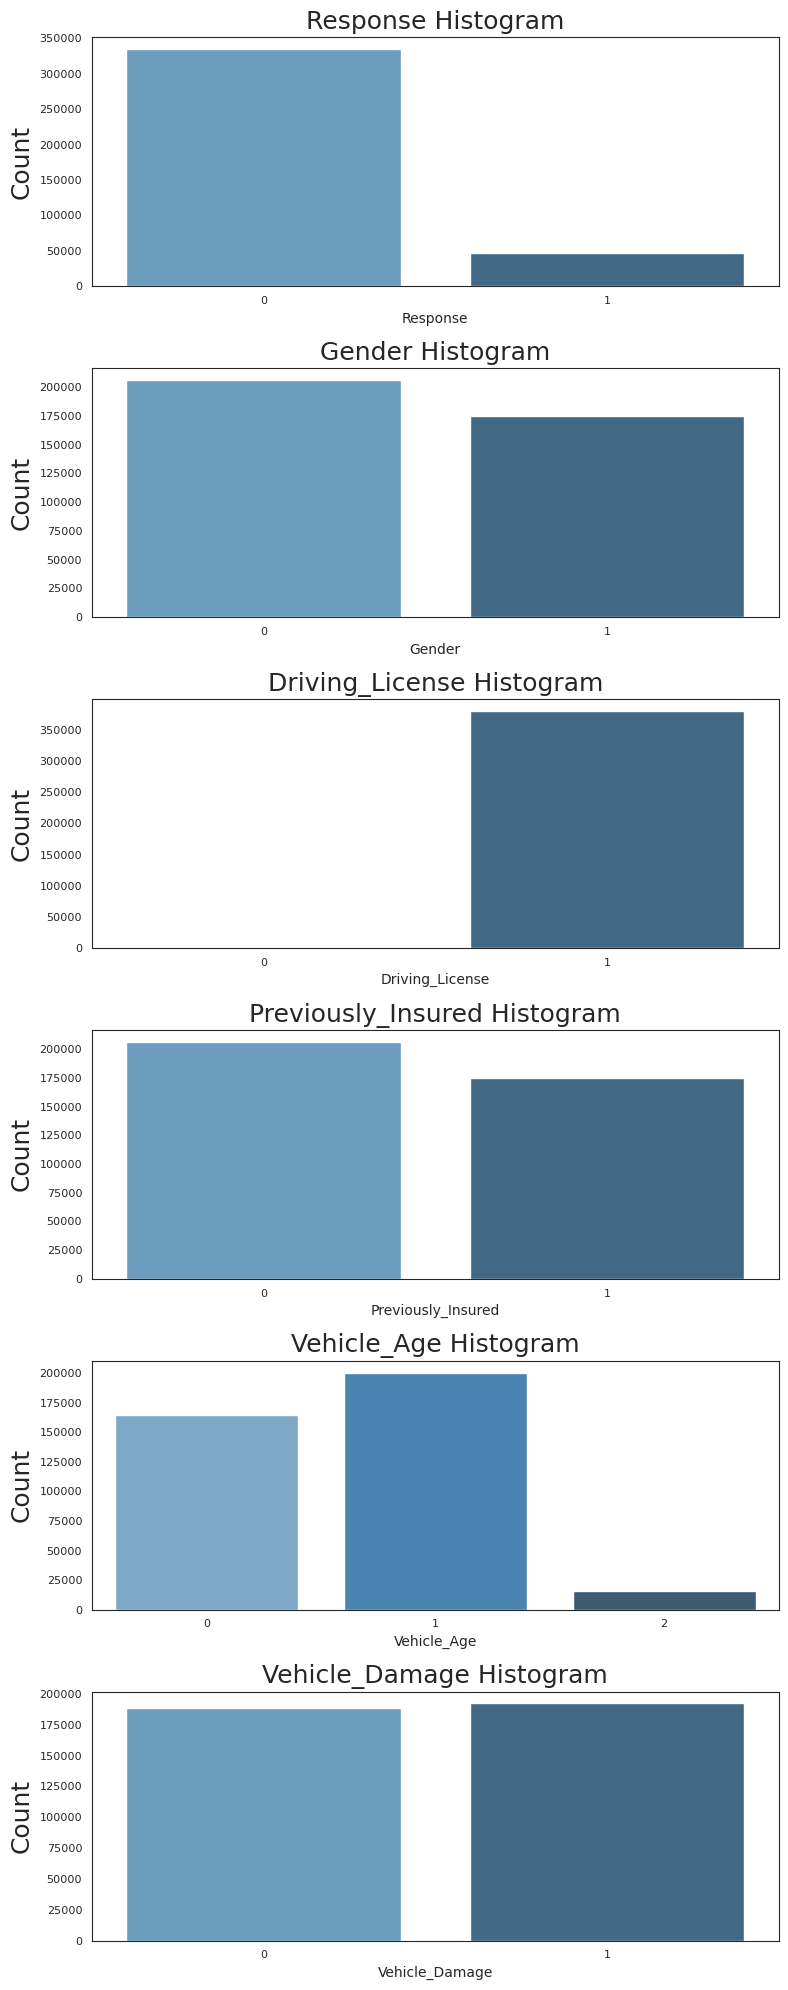

In [74]:
def plot_count(x,fig):
    plt.subplot(6,2,fig)
    sns.countplot(df_[x],palette=("Blues_d"))
    plt.title(x+' Histogram', size=18)
    plt.ylabel('Count', size=18)

plt.figure(figsize=(15,20))

plot_count('Response', 1)
plot_count('Gender', 3)
plot_count('Driving_License', 5)
plot_count('Previously_Insured', 7)
plot_count('Vehicle_Age', 9)
plot_count('Vehicle_Damage', 11)

plt.tight_layout()

### 2 Qual a influência de cada feature (idade, genêro, localização, idade do veículo, teve dano anterior no veículo, prêmio, dentre outras) no interesse pelo seguro.

"""
_________
#colinha#: O coeficiente de correlação varia de -1 a 1. Quando está próximo de 1, significa que existe 
uma forte correlação positiva; por exemplo, o valor médio da habitação tende a aumentar 
quando a renda média aumenta. Quando o coeficiente está próximo de -1, significa que 
existe uma forte correlação negativa. Finalmente, coeficientes próximos de zero significam que não há 
correlação linear
_________


"""

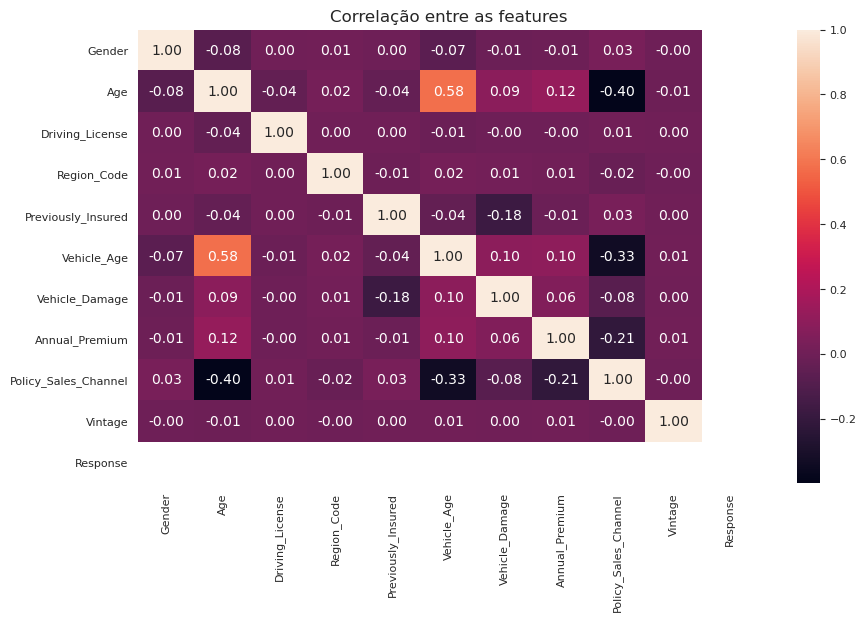

In [77]:
plt.figure(figsize=(10,6))
sns.heatmap(df_interested.corr(), fmt='.2f', annot=True)
plt.title("Correlação entre as features")
plt.show()

### 3 Qual a percentagem de clientes tem interesse no seguro em relação ao total.<gráfico> 

"""

O percentual de interessados é de 12.26%

"""

In [87]:
percentual = len(df_interested.Gender)/len(df_.Gender)*100
print(f'O percentual de interessados é de %.2f%%' %percentual)

O percentual de interessados é de 12.26%


### 4 Qual a distribuição da idade dos consumidores <grafico>

"""

Os clientes da seguradora de saúde estão em sua maioria na faixa dos 20 a 35 anos.

"""

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

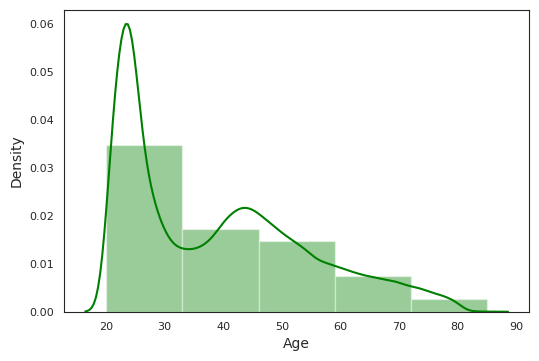

In [95]:
sns.distplot(df_.Age, bins=5, color='g')

### 5 Há relação entre o prêmio e a idade do cliente <gráfico> 

<AxesSubplot:xlabel='Annual_Premium', ylabel='Age'>

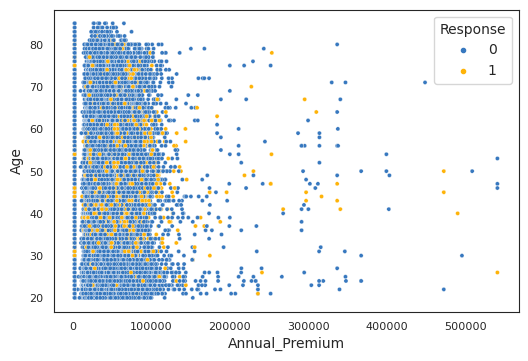

In [99]:
sns.scatterplot(x="Annual_Premium", y="Age", hue="Response", data=df_)

### 6 Entre os gêneros, há diferença no interesse pelo seguro veicular <homens se interessam mais>

"""

Visualmente, nota-se que os mais interessados no seguro veicular são os homens

"""

<AxesSubplot:xlabel='Gender', ylabel='count'>

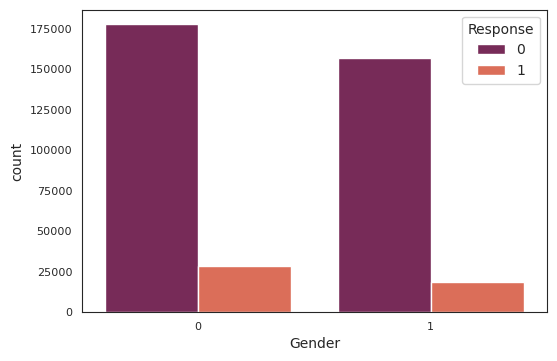

In [100]:
sns.countplot(x="Gender", hue="Response", data=df_, palette="rocket" )

### 7 Qual a quantidade de clientes tem habilitação (avaliar diferença por genêro) ****

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

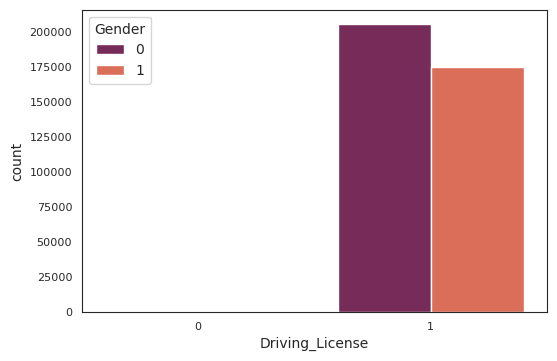

In [104]:
sns.countplot(x="Driving_License",hue="Gender", data=df_, palette="rocket" )

### 8 Qual a quantidade de clientes já teve seguro veicular.

"""

174.628 pessoas já tiveram seguro veicular

"""

In [105]:
df_.Previously_Insured.value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

### 9 A idade do veículo influência no interesse pelo seguro veicular.

In [109]:
"""

Vehicle_Age: 0: <1year, 1: 1-2years, 2: >2 anos
Aparantemente, quem tem veículos de até dois anos de uso tem mais interesse no seguro veicular

"""

'\n\nVehicle_Age: 0: <1year, 1: 1-2years, 2: >2 anos\nAparantemente, quem tem veículos de até dois anos de uso tem mais interesse no seguro veicular\n\n'

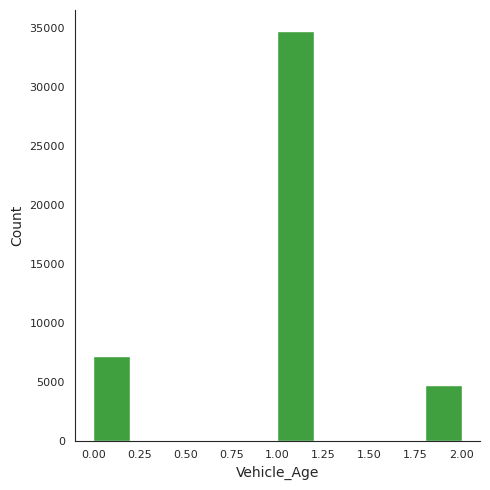

In [108]:
sns.displot(df_interested.Vehicle_Age, bins=10, color="g")

### 10 Clientes que já tiveram seus veículos danificados têm mais propensão a adquirir o seguro veicular 

"""

sim. e homens sao mais interessados

"""

1    45728
0      982
Name: Vehicle_Damage, dtype: int64


<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

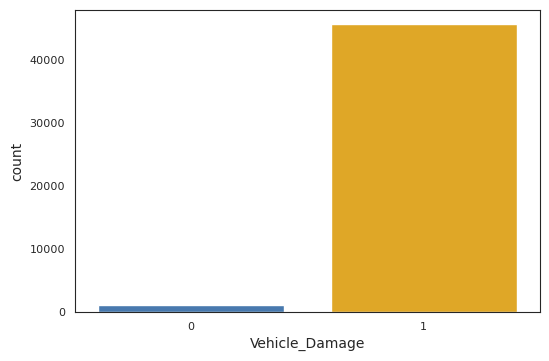

In [115]:
danificados = df_interested["Vehicle_Damage"].value_counts()
print(danificados)
sns.countplot(x="Vehicle_Damage", data=df_interested
             )


<AxesSubplot:xlabel='Gender', ylabel='Vehicle_Damage'>

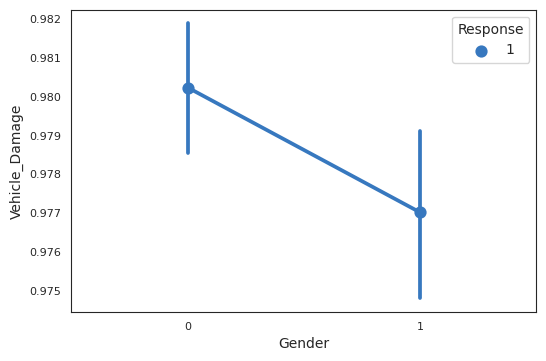

In [120]:
sns.pointplot(x="Gender", y="Vehicle_Damage" ,hue="Response", data=df_interested)

### 11 O número de dias que o cliente já é associado ao seguro de saúde (vintage) influência no interesse pelo seguro veicular.

"""

Não influencia

"""

In [134]:
interessados = df_interested["Vintage"].mean()
geral=df_["Vintage"].mean()

print("A média geral de permanência no seguro é de ",geral, "e a média dos interessados é de ", interessados )
      

A média geral de permanência no seguro é de  154.34739667654136 e a média dos interessados é de  154.11224577178334


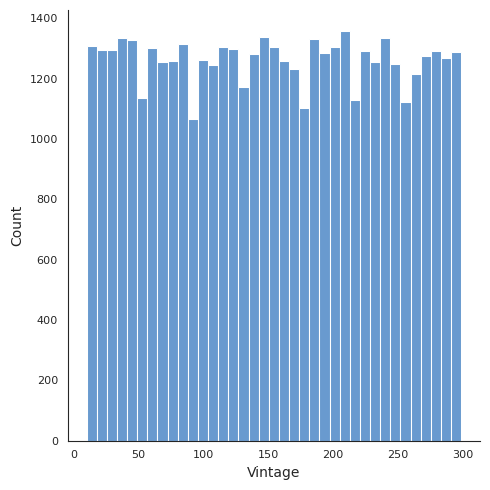

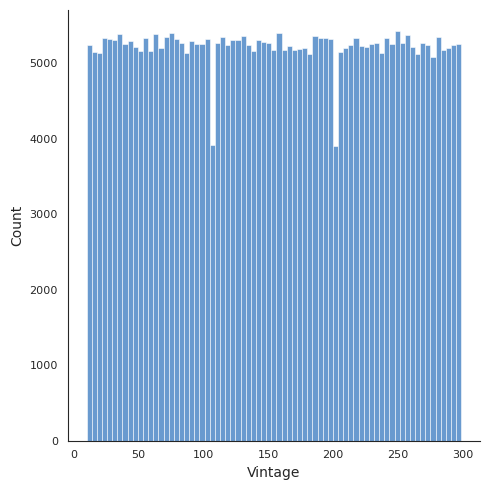

In [129]:
sns.displot(x="Vintage", data=df_interested)
sns.displot(x="Vintage", data=df_)

### 12 Quais estratégias a empresa pode adotar para captar esses clientes com maior propensão à aceitação do seguro veicular. ****

"""

A squad precisará definir o persona/target do MVP para idear as estratégias de mercado

"""

### 13 Quais estratégias a empresa pode adotar para captar mais clientes.****

"""

A squad precisará definir o persona/target do MVP para idear as estratégias de mercado

"""

### 14 Como poderíamos melhorar a qualidade do serviço prestado pela seguradora de saúde?

### 15) Por que será que a empresa quer oferecer seguro veicular?

### 16) Poderíamos calcular a receita líquida da empresa com os valores apresentados? (fazendo algumas simulações?)

### 17) Explorar melhor a variável Annual_Premium

### 18) Será que as mulheres poderiam receber uma oferta de seguro veicular x saúde diferenciada? O que os dados mostram sobre isso?

### 19) Poderemos dar nomes para as variáveis dos atributos Region_Code e Policy_Sales_Channel para brincarmos um pouco mais com os dados?

In [139]:
regiao= df["Region_Code"].value_counts()
regiao.sort_values()

51.0       183
52.0       267
42.0       591
44.0       808
1.0       1008
5.0       1279
40.0      1295
22.0      1309
19.0      1535
34.0      1664
4.0       1801
49.0      1832
20.0      1935
31.0      1960
23.0      1960
16.0      2007
0.0       2021
38.0      2026
24.0      2415
25.0      2503
26.0      2587
17.0      2617
43.0      2639
32.0      2787
27.0      2823
9.0       3101
12.0      3198
7.0       3279
13.0      4036
2.0       4038
21.0      4266
10.0      4374
39.0      4644
14.0      4678
48.0      4681
18.0      5153
37.0      5501
45.0      5605
6.0       6280
35.0      6942
47.0      7436
33.0      7654
36.0      8797
11.0      9232
3.0       9251
50.0     10243
29.0     11065
30.0     12191
15.0     13308
41.0     18263
46.0     19749
8.0      33877
28.0    106415
Name: Region_Code, dtype: int64

<AxesSubplot:xlabel='Region_Code', ylabel='count'>

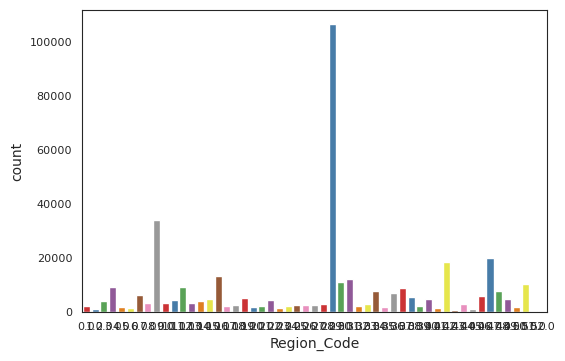

In [142]:
sns.countplot(x='Region_Code', data= df_, palette='Set1')

In [144]:
canal= df["Policy_Sales_Channel"].value_counts()
canal.sort_values()
canal

152.0    134784
26.0      79700
124.0     73995
160.0     21779
156.0     10661
          ...  
144.0         1
149.0         1
84.0          1
143.0         1
43.0          1
Name: Policy_Sales_Channel, Length: 155, dtype: int64

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='count'>

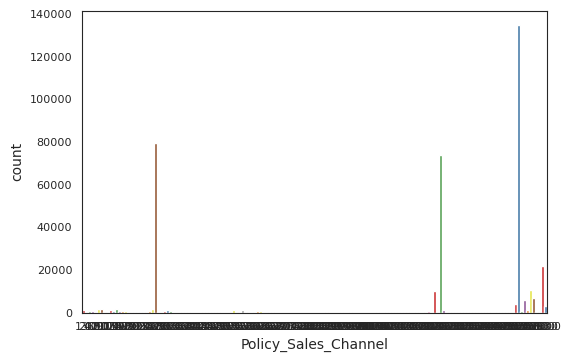

In [143]:
canal= df["Policy_Sales_Channel"].value_counts()
canal.sort_values()
canal
sns.countplot(x='Policy_Sales_Channel', data= df_, palette='Set1')

In [46]:
df_interested.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

# Criação do modelo e automação do processo

In [3]:
#Criando uma copia do dataset de treino 
df_train= df.copy()
df_train.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [4]:
#excluindo a coluna "id"
del df_train['id']
display(df_train)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
#importando bibliotecas
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree, svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer, SimpleImputer #Se necessário...
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [6]:
# Separando treino e teste

X = df_train.drop('Response', axis = 1)
y = df_train['Response']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y)

X_treino.shape, X_teste.shape, y_treino.shape, y_teste.shape

((285831, 10), (95278, 10), (285831,), (95278,))

## Cuidando do y

## Cuidando do X

In [7]:
#Verificando o tipo dos dados
X_treino.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

In [8]:
X_treino.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
79439,Female,80,1,28.0,0,1-2 Year,Yes,33944.0,116.0,96
345796,Male,37,1,28.0,0,1-2 Year,Yes,23920.0,26.0,212
312463,Male,43,1,47.0,0,1-2 Year,No,31405.0,124.0,112
157770,Male,35,1,28.0,0,1-2 Year,Yes,34145.0,124.0,14
236013,Female,24,1,47.0,1,< 1 Year,No,35177.0,152.0,138


In [9]:
#Separando as variáveis
variaveis_categoricas = [coluna for coluna in X_treino.columns if X_treino[coluna].dtype.name == 'object']
variaveis_categoricas

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [10]:
variaveis_numericas = [coluna for coluna in X_treino.columns if coluna not in variaveis_categoricas]
variaveis_numericas

['Age',
 'Driving_License',
 'Region_Code',
 'Previously_Insured',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Vintage']

In [11]:
# Separando tratamento para colunas categóricas (imputer = tratar dados faltantes)
pipeline_categoricas = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [12]:
# Tratamento para numéricas
pipeline_numericas = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

In [13]:
# 
pre_processamento = ColumnTransformer([
    ('cat', pipeline_categoricas, variaveis_categoricas),
    ('num', pipeline_numericas, variaveis_numericas)
])

In [14]:
#Criando as pipelines
pipeline_random_forest = make_pipeline(pre_processamento, RandomForestClassifier(random_state=42))
pipeline_log_reg = make_pipeline(pre_processamento, LogisticRegression(random_state=42))
pipeline_tree=make_pipeline(pre_processamento, tree.DecisionTreeClassifier(random_state=42))
pipeline_svm = make_pipeline(pre_processamento, svm.SVC(random_state=42))

In [15]:
#Estudando com o gridsearch para regressao logistica

param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipeline_log_reg, param_grid, cv=10)
grid.fit(X_treino, y_treino)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters:\n{}".format(grid.best_params_))


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

Best cross-validation score: 0.88
Best parameters:
{'logisticregression__C': 0.001}


## Testando os modelos preditivos

In [19]:
#Rodando o modelo Random Forest
pipeline_random_forest.fit(X_treino, y_treino)
pipeline_random_forest.score(X_teste, y_teste)

0.8672411259682193

In [20]:
#Rodando o modelo Regressão Logística
pipeline_log_reg.fit(X_treino, y_treino)
pipeline_log_reg.score(X_teste, y_teste)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8784714204748211

In [24]:
#Rodando o modelo Decision Tree
pipeline_tree.fit(X_treino, y_treino)
pipeline_tree.score(X_teste, y_teste)

0.8222779655324419

In [ ]:
#Rodando o modelo SVM
# nem rodou aqui...

pipeline_svm.fit(X_treino, y_treino)
pipeline_svm.score(X_teste, y_teste)

## Utilizando o cross validation

In [25]:
validacao_cruzada = KFold(n_splits=10, shuffle=True, random_state=42)
validacao_cruzada

KFold(n_splits=10, random_state=42, shuffle=True)

In [26]:
#Verificando a acurácia média do Random Forest
acuracia_media_rf = cross_val_score(pipeline_random_forest, X, y, cv=validacao_cruzada).mean()
acuracia_media_rf

0.865891386841738

In [28]:
#Verificando a acurácia média da Regressão Linear
acuracia_media_Lr= cross_val_score(pipeline_log_reg, X,y, cv=validacao_cruzada).mean()
acuracia_media_Lr

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

0.8774156488475799

In [27]:
#Verificando a acurácia média do Decisiom Tree
acuracia_media_tree= cross_val_score(pipeline_tree, X,y, cv=validacao_cruzada).mean()
acuracia_media_tree

0.8229535325285273

In [ ]:
#Verificando a acurácia média do SVM
acuracia_media_svm= cross_val_score(pipeline_svm, X,y, cv=validacao_cruzada).mean()

# Apresentação do resultado